In [1]:
import nltk
from nltk import word_tokenize
from nltk import FreqDist # need this to access "most_common" method

import urllib2

from IPython.display import Image

import re

import random

import numpy as np

from __future__  import division

### Questions to be answered in this chapter

### Using a Tagger

A simple example of using tags:

In [2]:
sent = "Today we will go to a beautiful town and have fun"
tokens = word_tokenize(sent)
nltk.pos_tag(tokens)

[('Today', 'NN'),
 ('we', 'PRP'),
 ('will', 'MD'),
 ('go', 'VB'),
 ('to', 'TO'),
 ('a', 'DT'),
 ('beautiful', 'JJ'),
 ('town', 'NN'),
 ('and', 'CC'),
 ('have', 'VBP'),
 ('fun', 'VBN')]

In the next example the words "refuse" and "permit" are homonyms:

In [3]:
text = word_tokenize("They refuse to permit us to obtain the refuse permit")
nltk.pos_tag(text)

[('They', 'PRP'),
 ('refuse', 'VBP'),
 ('to', 'TO'),
 ('permit', 'VB'),
 ('us', 'PRP'),
 ('to', 'TO'),
 ('obtain', 'VB'),
 ('the', 'DT'),
 ('refuse', 'NN'),
 ('permit', 'NN')]

#### text.similar()

In [4]:
text = nltk.Text(word.lower() for word in nltk.corpus.brown.words())
text.similar('woman')

man time day year car moment world family house country child boy
state job way war girl place word work


In [5]:
text.similar('play')

work be man time do have place get and see state life day use way it
go room school one


In [6]:
text.similar('is')

was in and of for as with to on had are at that has but from were by
if when


### Tagged Corpora

#### str2tuple()

Use str2tuple() to create one of these special tuples from the standard string

In [7]:
tagged_token = nltk.tag.str2tuple('play/VB')
tagged_token

('play', 'VB')

### Reading Tagged Corpora

#### Read tagged corpora from the "brown" corpus

In [8]:
tagged_words = nltk.corpus.brown.tagged_words()
tagged_words[:5]

[(u'The', u'AT'),
 (u'Fulton', u'NP-TL'),
 (u'County', u'NN-TL'),
 (u'Grand', u'JJ-TL'),
 (u'Jury', u'NN-TL')]

In [9]:
fd = nltk.FreqDist(tag for (word, tag) in tagged_words)
fd.most_common(5)

[(u'NN', 152470),
 (u'IN', 120557),
 (u'AT', 97959),
 (u'JJ', 64028),
 (u'.', 60638)]

The code above give use the frequency distribution for most commonly seen tags in the brown corpus.

#### tagset = 'universal'

In [10]:
universal_tags = nltk.corpus.brown.tagged_words(tagset = 'universal')
universal_tags[:5]

[(u'The', u'DET'),
 (u'Fulton', u'NOUN'),
 (u'County', u'NOUN'),
 (u'Grand', u'ADJ'),
 (u'Jury', u'NOUN')]

Use 'universal' tags because not all corpora use the same tagset. The universal tagset will standardize the simplify the tagset

#### Plot the freqdist of most common tags

In [11]:
brown_universal_tags = nltk.corpus.brown.tagged_words(tagset = 'universal')
fd = nltk.FreqDist(tag for (word, tag) in brown_universal_tags)
fd.most_common(5)

[(u'NOUN', 275558),
 (u'VERB', 182750),
 (u'.', 147565),
 (u'ADP', 144766),
 (u'DET', 137019)]

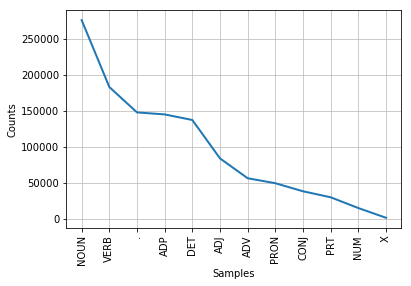

In [12]:
fd.plot()

### Get most common words tagged as 'VERB'

In [13]:
treebank_tags = nltk.corpus.treebank.tagged_words(tagset = 'universal')
word_tag_fd = nltk.FreqDist(treebank_tags)

In [14]:
most_freq_verbs = [word_tag_pair[0] for (word_tag_pair, freq) in word_tag_fd.most_common() if word_tag_pair[1] == 'VERB']
most_freq_verbs[:5]


[u'is', u'said', u'was', u'are', u'be']

Please note here the (word, tag) pairs are treated together for most_common

### Exploring Tagged Corpora

#### Practice: find the tags for the word "like"

In [15]:
word_tag = nltk.corpus.brown.tagged_words(tagset = 'universal', categories = 'learned')
fd = nltk.FreqDist(tag for (word, tag) in word_tag if word == 'like')
fd.tabulate()

 ADP VERB  ADJ 
  65    9    9 


Pay attention to the "tabulate" method here.

### Mapping Words to Properties Using Python

#### Indexing Lists vs Dictionaries

When you do sorted(dictionary), it sorts the indexes, not the values.

In [22]:
dict_ = {'a':1, 'b':2, 'c':3, 'd':4}
dict_

{'a': 1, 'b': 2, 'c': 3, 'd': 4}

In [30]:
sorted(dict_)

['a', 'b', 'c', 'd']

In [29]:
sorted(dict_.values())

[1, 2, 3, 4]

#### Default Dictionaries

Problem with dict is that if the key does not exist the dict will return error. But you can do "defaultdict" to solve this problem.

In [32]:
from collections import defaultdict

dict_ = defaultdict(int) # set the default parameter type to be int
dict_['a'] = 1 # update the dict
dict_

defaultdict(int, {'a': 1})

In [34]:
# now let's index the dict using a key that does not exist:
dict_['b'] # you get 0 since 0 is the default value for data type int in the default dict

0

In [35]:
dict_2 = defaultdict(lambda: 'default_value') # set the default parameter type to be int
dict_2['a'] = 1 # update the dict
dict_2

defaultdict(<function __main__.<lambda>>, {'a': 1})

In [36]:
dict_2['b']

'default_value'

In [40]:
from collections import defaultdict
counts = defaultdict(int)
from nltk.corpus import brown
for (word, tag) in brown.tagged_words(categories='news', tagset='universal'):
    counts[tag] += 1
counts

defaultdict(int,
            {u'.': 11928,
             u'ADJ': 6706,
             u'ADP': 12355,
             u'ADV': 3349,
             u'CONJ': 2717,
             u'DET': 11389,
             u'NOUN': 30654,
             u'NUM': 2166,
             u'PRON': 2535,
             u'PRT': 2264,
             u'VERB': 14399,
             u'X': 92})

Watch the dict[key] += 1 here.

#### Append data to list in a dict

In [48]:
dict_3 = defaultdict(list) # set the default parameter type to be int
dict_3['a'] = 1 # update the dict
dict_3

defaultdict(list, {'a': 1})

In [49]:
dict_3['b']

[]

In [50]:
dict_3['b'].append('zzz')
dict_3['b'].append(5)
dict_3

defaultdict(list, {'a': 1, 'b': ['zzz', 5]})

Let's create a dict append all the words end with "long":

In [53]:
dict_end_with_long = defaultdict(list)
for word in nltk.corpus.words.words('en'):
    if word[-4:] == 'long':

        dict_end_with_long[word[-4:]].append(word)

dict_end_with_long['long']

[u'agelong',
 u'along',
 u'amlong',
 u'anklong',
 u'Barolong',
 u'belong',
 u'cacholong',
 u'daylong',
 u'endlong',
 u'erelong',
 u'evelong',
 u'evenlong',
 u'flong',
 u'furlong',
 u'gelong',
 u'headlong',
 u'hollong',
 u'kalong',
 u'leaguelong',
 u'lifelong',
 u'livelong',
 u'long',
 u'nightlong',
 u'oblong',
 u'oolong',
 u'ovatooblong',
 u'overlong',
 u'prolong',
 u'rebelong',
 u'semilong',
 u'sidelong',
 u'sublong',
 u'upalong',
 u'uplong',
 u'yearlong']

#### Invert a Dictionary

In [54]:
counts

defaultdict(int,
            {u'.': 11928,
             u'ADJ': 6706,
             u'ADP': 12355,
             u'ADV': 3349,
             u'CONJ': 2717,
             u'DET': 11389,
             u'NOUN': 30654,
             u'NUM': 2166,
             u'PRON': 2535,
             u'PRT': 2264,
             u'VERB': 14399,
             u'X': 92})

nltk.Index to reindex and create a new dict

In [57]:
counts_invert = nltk.Index((value, key) for (key, value) in counts.items())
counts_invert

Index(list,
      {92: [u'X'],
       2166: [u'NUM'],
       2264: [u'PRT'],
       2535: [u'PRON'],
       2717: [u'CONJ'],
       3349: [u'ADV'],
       6706: [u'ADJ'],
       11389: [u'DET'],
       11928: [u'.'],
       12355: [u'ADP'],
       14399: [u'VERB'],
       30654: [u'NOUN']})